In [1]:
from logicqubit.logic import *
import random
import matplotlib.pyplot as plt

Cuda is not available!
logicqubit version 1.5.6


/home/cleoner/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


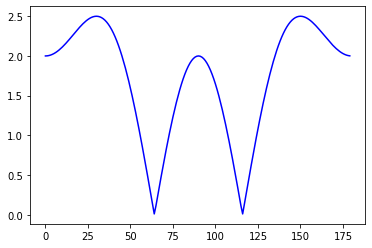

In [2]:
def measurement(type_A, type_B, angle):
    logicQuBit = LogicQuBit(2)
    
    gates = Gates()
    ZZ = gates.Z().kron(gates.Z())
    
    angle = angle*pi/180

    A = Qubit()
    B = Qubit()

    # generate entangled state |01>+|10>
    A.H()
    B.CNOT(A)
    B.X()
    #B.Z()

    # Alice choose the measurement
    if 'X' in type_A:
        A.RY(2*angle)

    # Bob choose the measurement
    if 'X' in type_B:
        B.RY(2*angle)
        
    psi = logicQuBit.getPsi()
    value = (psi.adjoint()*ZZ*psi).get()[0]
    
    return value

step = 1 
angles = np.arange(0, 180, step)
result = []
for angle in angles:
    zz = measurement('Z','Z', angle)
    xz = measurement('X','Z', angle)
    zx = measurement('Z','X', angle)
    xx = measurement('X','X', angle)
    inequality = zz + xz + zx - xx
    inequality = sqrt(inequality.real * inequality.real)
    result.append(inequality)
    
plt.plot(angles, result, color='blue')
plt.show()

In [3]:
# |<C>| = |<z.z> + <x.z> + <z.x> - <x.x>| <= 2
def bell_inequality(A, B):
    direction = {'zz':0, 'xz':0, 'zx':0, 'xx':0}
    count = {'zz':0, 'xz':0, 'zx':0, 'xx':0}
    
    for a,b in zip(A,B):
        if a[0]=='Z' and b[0]=='Z':
            direction['zz'] += a[1]*b[1]
            count['zz'] += 1
        elif a[0]=='X' and b[0]=='Z':
            direction['xz'] += a[1]*b[1]
            count['xz'] += 1
        elif a[0]=='Z' and b[0]=='X':
            direction['zx'] += a[1]*b[1]
            count['zx'] += 1
        elif a[0]=='X' and b[0]=='X':
            direction['xx'] += a[1]*b[1]
            count['xx'] += 1

    direction['zz'] /= count['zz']
    direction['xz'] /= count['xz']
    direction['zx'] /= count['zx']
    direction['xx'] /= count['xx']
    inequality = direction['zz'] + direction['xz'] + direction['zx'] - direction['xx']
    inequality = sqrt(inequality * inequality)
    #print(direction)
    return inequality

def measurements(eva=False, attempts=10, angle = 45):
    to_minus_one = lambda x: -1 if x == 0 else x
    measure_A = []
    measure_B = []

    angle = angle*pi/180     
    for i in range(attempts):
        logicQuBit = LogicQuBit(2)

        A = Qubit()
        B = Qubit()

        # generate entangled state |01>+|10>
        A.H()
        B.CNOT(A)
        B.X()

        # Alice choose the measurement
        measure_type_A = random.choice(['Z', 'X'])
        if 'X' == measure_type_A:
            A.RY(2*angle)
            #A.H()

        # Alice performs the measurement
        m_A = logicQuBit.Measure_One(A)[0]
        m_A = to_minus_one(m_A)

        # Eva performs the measurement
        if eva:
            measure_type_E = random.choice(['Z', 'X'])
            if 'X' == measure_type_E:
                B.RY(2*angle)
                #B.H()
            m_E = logicQuBit.Measure_One(B)[0]

        # Bob choose the measurement
        measure_type_B = random.choice(['Z', 'X'])
        if 'X' == measure_type_B:
            B.RY(2*angle)
            #B.H()

        # Bob performs the measurement
        m_B = logicQuBit.Measure_One(B)[0]
        m_B = to_minus_one(m_B)

        measure_A.append([measure_type_A, m_A])
        measure_B.append([measure_type_B, m_B])

    return measure_A, measure_B

def separete_data(A, B):
    equals = [A[i] for i in range(len(A)) if A[i] == B[i]]
    error = [A[i] for i in range(len(A)) if A[i][0] == B[i][0] and A[i][1] != B[i][1]]
    a = [A[i] for i in range(len(A)) if A[i] != B[i]]
    b = [B[i] for i in range(len(B)) if A[i] != B[i]]
    return equals, error, a, b

measure_A, measure_B = measurements(eva=False, attempts=1000, angle=40)
key, error, a, b = separete_data(measure_A, measure_B)
bell = bell_inequality(measure_A, measure_B)
size_key_x = len([i for i in key if i[0]=='X'])
size_key_z = len([i for i in key if i[0]=='Z'])
key_diff = [i for i in key if i]

print(size_key_z, size_key_x)
print(bell.real, len(key), len(error))

0 251
2.337107990778719 251 236


value: 2.2099100984022626


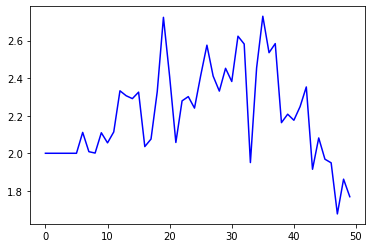

In [16]:
# without eva, angle = 0 - 50
step = 1 
angles = np.arange(0, 50, step)
result_without_eva = []
for angle in angles:
    measure_A, measure_B = measurements(eva=False, attempts=200, angle=angle)
    bell = bell_inequality(measure_A, measure_B)
    result_without_eva.append(bell)
mean_without_eva = np.mean(result_without_eva)
print("value: "+str(mean_without_eva.real))
plt.plot(angles, result_without_eva, color='blue')
plt.show()

value: 1.7401958785808138


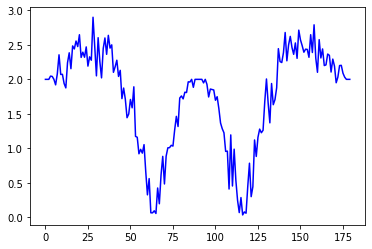

In [17]:
# without eva, angle = 0 - 180
step = 1 
angles = np.arange(0, 180, step)
result_without_eva = []
for angle in angles:
    measure_A, measure_B = measurements(eva=False, attempts=200, angle=angle)
    bell = bell_inequality(measure_A, measure_B)
    result_without_eva.append(bell)
mean_without_eva = np.mean(result_without_eva)
print("value: "+str(mean_without_eva.real))
plt.plot(angles, result_without_eva, color='blue')
plt.show()

value: 1.2589804718960627


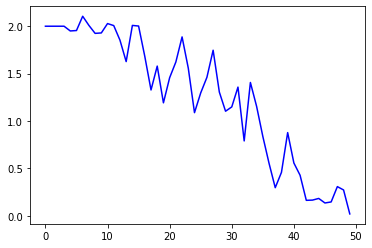

In [18]:
# with eva, angle = 0 - 50
step = 1 
angles = np.arange(0, 50, step)
result_with_eva = []
for angle in angles:
    measure_A, measure_B = measurements(eva=True, attempts=200, angle=angle)
    bell = bell_inequality(measure_A, measure_B)
    result_with_eva.append(bell)
mean_with_eva = np.mean(result_with_eva)
print("value: "+str(mean_with_eva.real))
plt.plot(angles, result_with_eva, color='blue')
plt.show()

value: 0.873977657175818


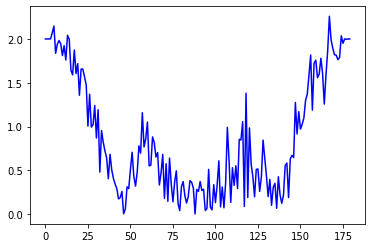

In [19]:
# with eva, angle = 0 - 180
step = 1 
angles = np.arange(0, 180, step)
result_with_eva = []
for angle in angles:
    measure_A, measure_B = measurements(eva=True, attempts=200, angle=angle)
    bell = bell_inequality(measure_A, measure_B)
    result_with_eva.append(bell)
mean_with_eva = np.mean(result_with_eva)
print("value: "+str(mean_with_eva.real))
plt.plot(angles, result_with_eva, color='blue')
plt.show()